\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 4403 & Homework 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3
## Given

\begin{center}
\includegraphics{images/fig1}
\end{center}

## Find
Sketch a free-body diagram of each element in the figure above. Compute the magnitude and direction of each force using an algebraic or vector method.

## Solution
The overall structure has a free body diagram like so,

\begin{center}
\includegraphics{images/fig2}
\end{center}

Separating the structure into individual elements would yield more equations to solve the system,

\begin{center}
\includegraphics{images/fig3} \\
Link 2
\end{center}

\begin{center}
\includegraphics{images/fig4} \\
Link 3
\end{center}

The $800\ N$ force is a point load, which means it can only be applied to one link. This is why the load is shown in one FBD and not the other. Changing the link the point load is applied to will change the values for $F_1$ and $F_2$, but it will not change the values of the reactions at $O$ and $A$.

In [2]:
v = Ox, Oy, Ax, Ay, F1, F2 = sp.symbols('O_x O_y A_x A_y F_1 F_2')
y, x = sp.S(0.9), sp.S(0.9)/sp.tan(60*sp.pi/180)  # Vertical and horizontal distance of the structure

# Overall structure equations
eq1 = sp.Eq(Ox + Ax, 800)  # Sum in x
eq2 = sp.Eq(Oy - Ay, 0)  # Sum in y
eq3 = sp.Eq(-Ay*x + 800*y, 0)  # Sum the moments about O

# Link 2 equations
eq4 = sp.Eq(Ox + F1, 800)  # Sum in x
eq5 = sp.Eq(Oy, F2)  # Sum in y
eq6 = sp.Eq(F1*y, 800*y)  # Sum the moments about O

# Link 3 equations (don't need to use and still get the same answer)
# eq4 = sp.Eq(Ax, F1)
# eq5 = sp.Eq(Ay, F2)
# eq6 = sp.Eq(F2*x, F1*y)

eqs = [eval(f'eq{i}') for i in range(1, 7)]

for eq in eqs:
    display(eq)
display(Markdown('---'))

A, b = sp.linear_eq_to_matrix(eqs, v)
matrix_eqn = sp.Eq(sp.MatMul(A, sp.Matrix(v)), b)
display(matrix_eqn)
display(Markdown('---'))

sol = sp.solve(matrix_eqn)
display(Markdown('**Solution:**'))
for val in v:
    display(sp.Eq(val, sol[val]))

Eq(A_x + O_x, 800)

Eq(-A_y + O_y, 0)

Eq(-0.3*sqrt(3)*A_y + 720.0, 0)

Eq(F_1 + O_x, 800)

Eq(O_y, F_2)

Eq(0.9*F_1, 720.0)

---

Eq(Matrix([
[1, 0, 1,            0,   0,  0],
[0, 1, 0,           -1,   0,  0],
[0, 0, 0, -0.3*sqrt(3),   0,  0],
[1, 0, 0,            0,   1,  0],
[0, 1, 0,            0,   0, -1],
[0, 0, 0,            0, 0.9,  0]])*Matrix([
[O_x],
[O_y],
[A_x],
[A_y],
[F_1],
[F_2]]), Matrix([
[   800],
[     0],
[-720.0],
[   800],
[     0],
[ 720.0]]))

---

**Solution:**

Eq(O_x, 0.0)

Eq(O_y, 1385.6406460551)

Eq(A_x, 800.0)

Eq(A_y, 1385.6406460551)

Eq(F_1, 800.0)

Eq(F_2, 1385.6406460551)

The internal stresses of each link may be found by using the method of sections.

\begin{center}
\includegraphics{images/fig5} \\
Upper Section Cut
\end{center}

\begin{center}
\includegraphics{images/fig6} \\
Lower Section Cut
\end{center}

In [3]:
F_OB, F_AB = sp.symbols(r'F_{OB} F_{AB}')

# Upper section equations
eq7 = sp.Eq(F_AB*sp.cos(sp.pi/3), 800)  # Sum in x
eq8 = sp.Eq(F_OB, F_AB*sp.sin(sp.pi/3))  # Sum in y

display(eq7)
display(eq8)
display(Markdown('---'))

sol = sp.solve([eq7, eq8])

for val in [F_OB, F_AB]:
    display(sp.Eq(val, sol[val].n()))

Eq(F_{AB}/2, 800)

Eq(F_{OB}, sqrt(3)*F_{AB}/2)

---

Eq(F_{OB}, 1385.6406460551)

Eq(F_{AB}, 1600.0)

Link 2 is in compression and link 3 is in tension.

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 5
## Given

\begin{center}
\includegraphics{images/fig7}
\end{center}

## Find
Find the reactions at the supports and plot the shear and bending moment diagrams.

## Solution
Due to the large amount of practice, this problem is quite simple and can be plotted instantly without showing calculation.

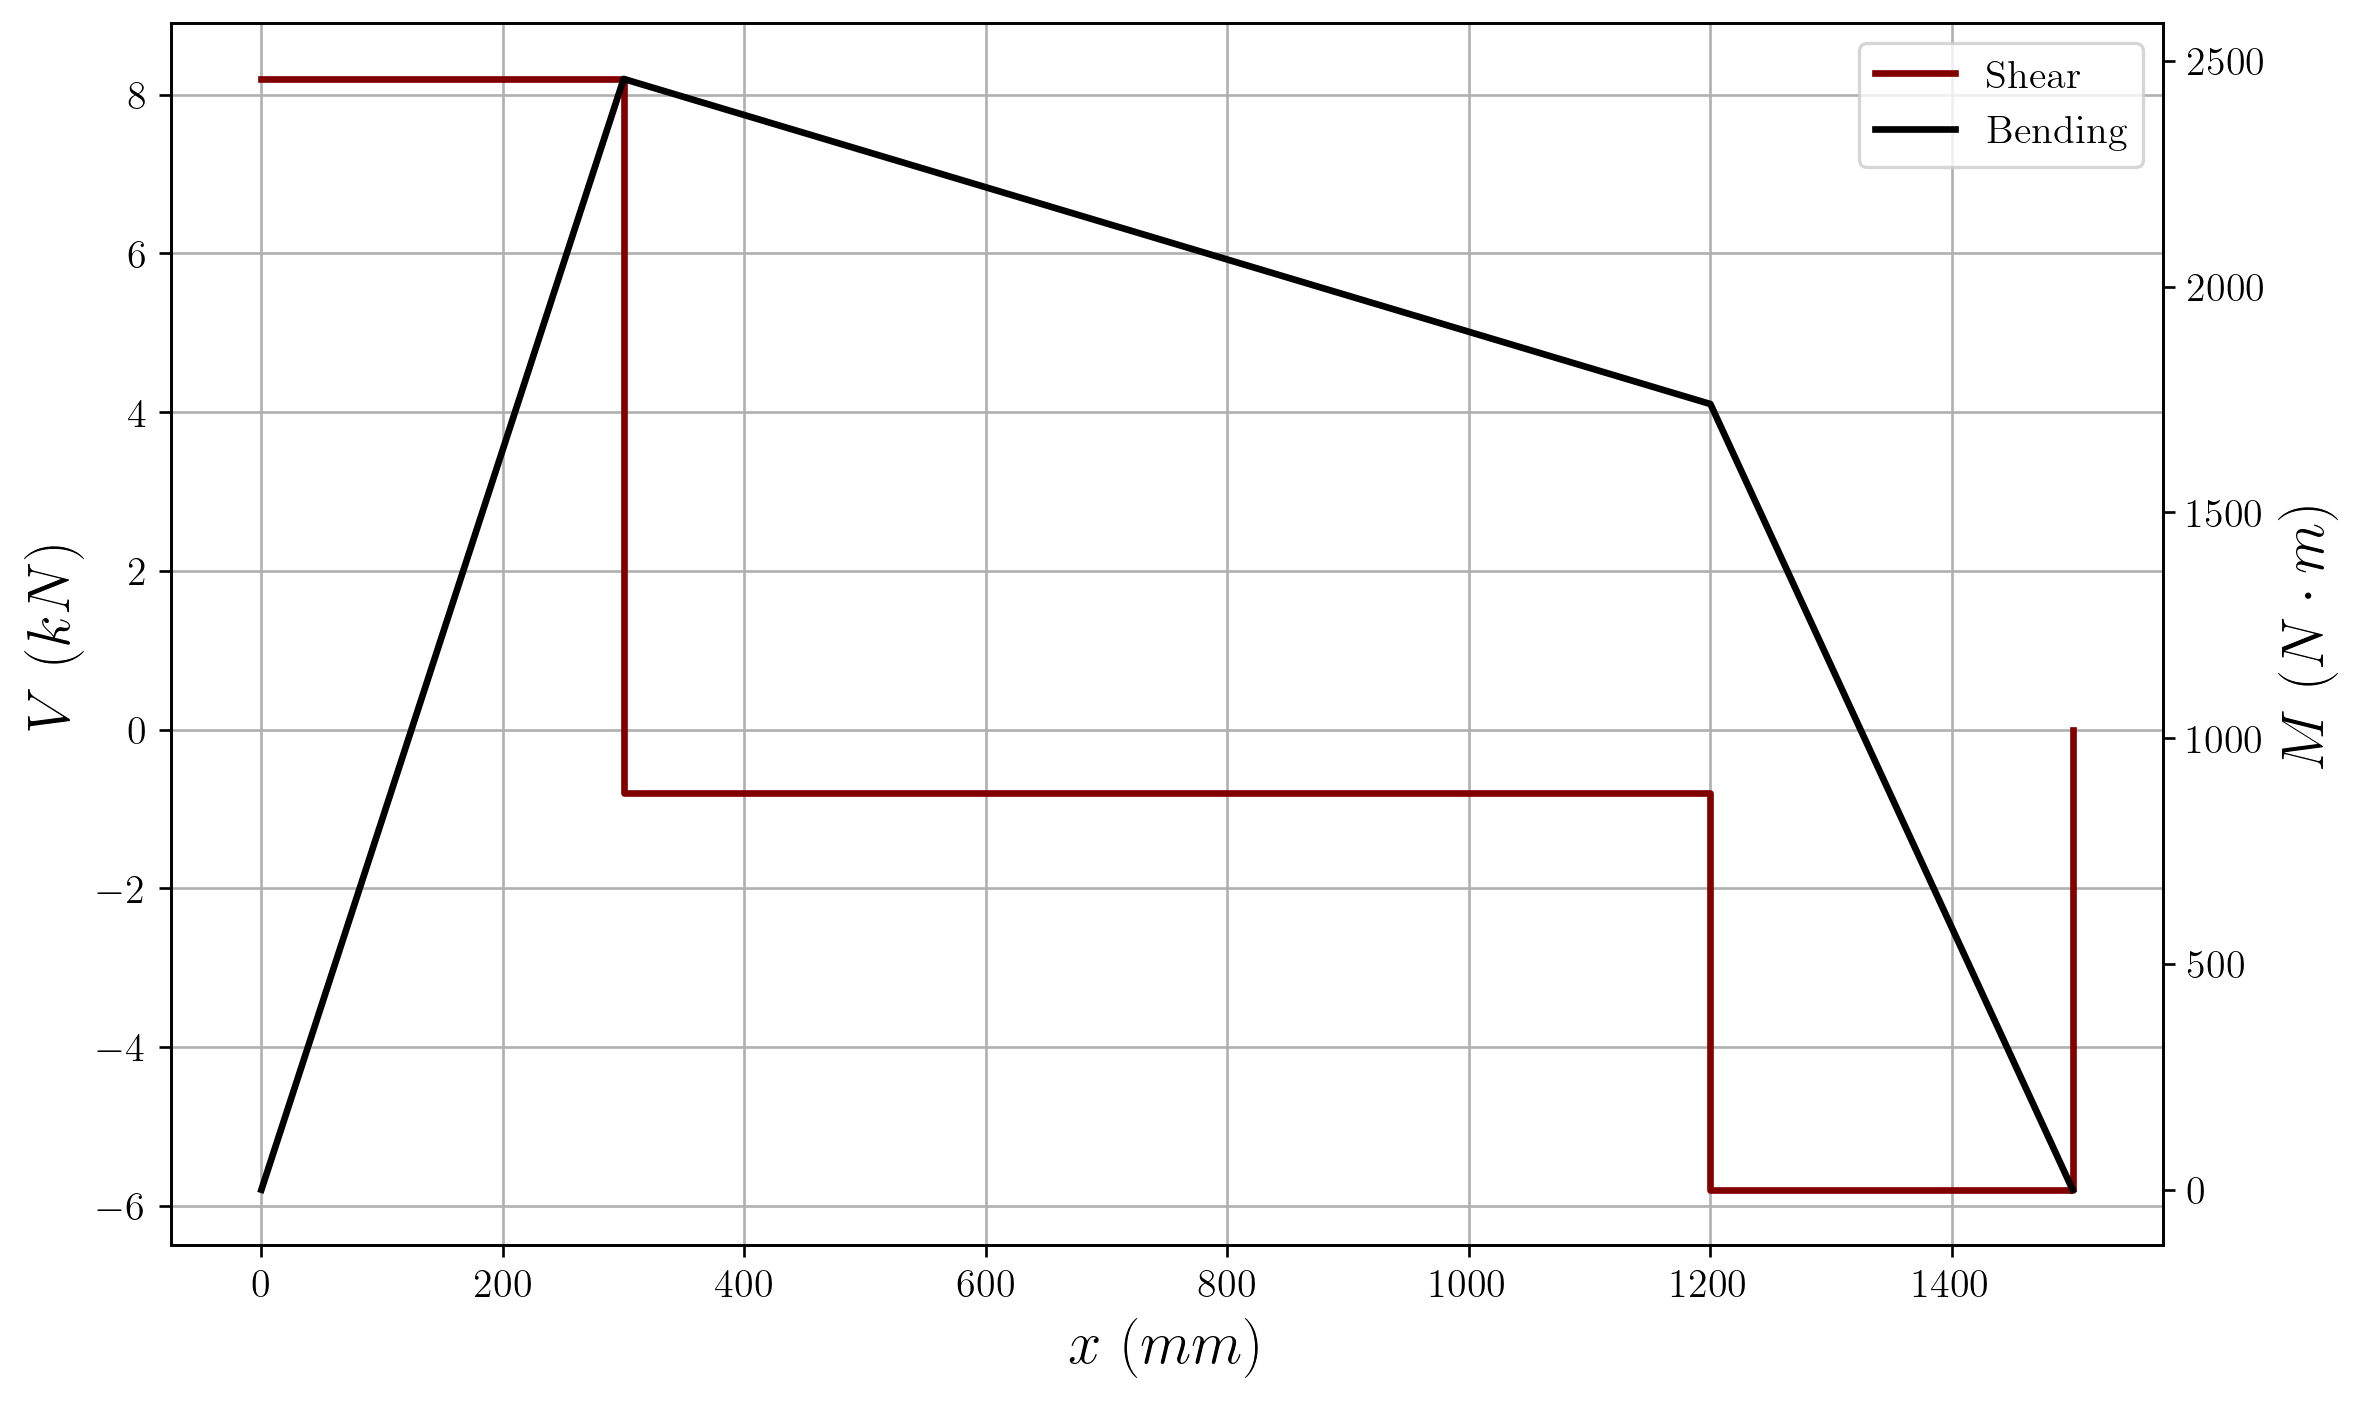

In [4]:
O, A, B, C = 0, 300, 300 + 900, 300 + 900 + 300
V_O, V_A, V_B, V_C = 8.2, 8.2 - 9, 8.2 - 9 - 5, 0  # Values shortly after cross the point
M_O, M_A, M_B, M_C = 0, V_O*300, V_O*300 + V_A*900, V_O*300 + V_A*900 + V_B*300

x = [O, A, A, B, B, C, C]
V = [V_O, V_O, V_A, V_A, V_B, V_B, V_C]
x_bending = [0, A, B, C]
M = [M_O, M_A, M_B, M_C]

fig, shear = plt.subplots()
bend = shear.twinx()

shear.plot(x, V, label='Shear')

shear.set_xlabel('$x$ ($mm$)')
shear.set_ylabel('$V$ ($kN$)')

bend.plot(x_bending, M, label='Bending', color='black')
bend.set_ylabel(r'$M$ ($N\cdot m$)')
bend.grid(visible=False)

shear.legend(handles=[shear.lines[0], bend.lines[0]], labels=['Shear', 'Bending'])

plt.show()

Notice that the plot above has a dual y-axis.

The values at the points are (shortly after for the shear values),

* $V_O=8.2\ kN$, $M_O=0\ N\cdot m$
* $V_A=-0.8\ kN$, $M_A=2460\ N\cdot m$
* $V_B=-5.8\ kN$, $M_B=1740\ N\cdot m$
* $V_C=0\ kN$, $M_C=0\ N\cdot m$